# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


In [3]:
#just checking 
print(cities[0:10])

['omdurman', 'champerico', 'waitangi', 'howrah', 'ust-nera', 'grytviken', 'blackmans bay', 'edinburgh of the seven seas', 'beyneu', 'shalkar']


---

In [10]:
#make it work with one city, then apply to for loop
city = 'edinburgh of the seven seas'
url_city = f'https://api.openweathermap.org/data/2.5/weather?q={city}&APPID={weather_api_key}'
response = requests.get(url_city).json()
print(json.dumps(response,indent=4,sort_keys=True))


{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -37.0676,
        "lon": -12.3116
    },
    "dt": 1693451243,
    "id": 3370726,
    "main": {
        "feels_like": 283.64,
        "grnd_level": 1032,
        "humidity": 65,
        "pressure": 1036,
        "sea_level": 1036,
        "temp": 284.73,
        "temp_max": 284.73,
        "temp_min": 284.73
    },
    "name": "Edinburgh of the Seven Seas",
    "sys": {
        "country": "SH",
        "sunrise": 1693465942,
        "sunset": 1693506448
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 218,
        "gust": 7.54,
        "speed": 7.82
    }
}
[{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}]


In [25]:
#testing before running 600 cities
weather = response["weather"]
c_lat = response['coord']['lat']
c_lng = response['coord']['lon']
m_temp = city_weather['main']['temp_max']
c_humidity = city_weather['main']['humidity']
c_clouds = city_weather['clouds']['all']
c_wind = city_weather['wind']['speed']
c_country = city_weather['sys']['country']
c_date = city_weather['dt']
print(weather)

[{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}]


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url = 'api.openweathermap.org'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&APPID={weather_api_key}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | omdurman
Processing Record 2 of Set 1 | champerico
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | howrah
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | beyneu
Processing Record 10 of Set 1 | shalkar
Processing Record 11 of Set 1 | wanning
Processing Record 12 of Set 1 | kuta
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | hihifo
City not found. Skipping...
Processing Record 17 of Set 1 | richmond
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | aleksandrov gay
Processing Record 22 of Set 1 | 

Processing Record 40 of Set 4 | bel ombre
Processing Record 41 of Set 4 | howard springs
Processing Record 42 of Set 4 | ramhormoz
Processing Record 43 of Set 4 | kavaratti
Processing Record 44 of Set 4 | aksu
Processing Record 45 of Set 4 | udachny
Processing Record 46 of Set 4 | north battleford
Processing Record 47 of Set 4 | kidal
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | mount isa
Processing Record 0 of Set 5 | karratha
Processing Record 1 of Set 5 | sosnogorsk
Processing Record 2 of Set 5 | flying fish cove
Processing Record 3 of Set 5 | corumba
Processing Record 4 of Set 5 | whakatane
Processing Record 5 of Set 5 | qujing
Processing Record 6 of Set 5 | rosarito
Processing Record 7 of Set 5 | carutapera
Processing Record 8 of Set 5 | fort bragg
Processing Record 9 of Set 5 | kapa'a
Processing Record 10 of Set 5 | soio
Processing Record 11 of Set 5 | sarangani
Processing Record 12 of Set 5 | santa cruz
Processing Record 13 of Set 5 | margate
Process

Processing Record 28 of Set 8 | weno
Processing Record 29 of Set 8 | namibe
Processing Record 30 of Set 8 | gashua
Processing Record 31 of Set 8 | queenstown
Processing Record 32 of Set 8 | chaoyang
Processing Record 33 of Set 8 | leninskoye
Processing Record 34 of Set 8 | touba
Processing Record 35 of Set 8 | nadi
Processing Record 36 of Set 8 | boituva
Processing Record 37 of Set 8 | betio village
Processing Record 38 of Set 8 | saint-pierre
Processing Record 39 of Set 8 | arvayheer
Processing Record 40 of Set 8 | medeiros neto
Processing Record 41 of Set 8 | caleta de carquin
Processing Record 42 of Set 8 | birjand
Processing Record 43 of Set 8 | gaspe
Processing Record 44 of Set 8 | westport
Processing Record 45 of Set 8 | ambon
Processing Record 46 of Set 8 | griffith
Processing Record 47 of Set 8 | volcan
Processing Record 48 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 49 of Set 8 | lata
Processing Record 0 of Set 9 | forbes
Processing Record 1 of Set 9 | 

Processing Record 14 of Set 12 | howell
Processing Record 15 of Set 12 | mikuni
Processing Record 16 of Set 12 | vovchans'k
Processing Record 17 of Set 12 | qiancheng
Processing Record 18 of Set 12 | spring creek
Processing Record 19 of Set 12 | toliara
Processing Record 20 of Set 12 | steamboat springs
Processing Record 21 of Set 12 | lesnoy
Processing Record 22 of Set 12 | nadym
Processing Record 23 of Set 12 | barranca
Processing Record 24 of Set 12 | terenozek
Processing Record 25 of Set 12 | nashtarud
City not found. Skipping...
Processing Record 26 of Set 12 | quellon
Processing Record 27 of Set 12 | tucuma
Processing Record 28 of Set 12 | mahina
Processing Record 29 of Set 12 | connell
Processing Record 30 of Set 12 | silver city
Processing Record 31 of Set 12 | savsjo
City not found. Skipping...
Processing Record 32 of Set 12 | takelsa
Processing Record 33 of Set 12 | yagry
City not found. Skipping...
Processing Record 34 of Set 12 | havre
Processing Record 35 of Set 12 | wamba

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,omdurman,15.6445,32.4777,300.56,63,100,4.99,SD,1693453654
1,champerico,14.3000,-91.9167,300.54,80,100,3.00,GT,1693453655
2,waitangi,-43.9535,-176.5597,285.27,82,8,1.34,NZ,1693453655
3,howrah,22.5892,88.3103,306.15,75,20,1.54,IN,1693453655
4,ust-nera,64.5667,143.2000,288.21,84,97,3.88,RU,1693453655


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,omdurman,15.6445,32.4777,300.56,63,100,4.99,SD,1693453654
1,champerico,14.3000,-91.9167,300.54,80,100,3.00,GT,1693453655
2,waitangi,-43.9535,-176.5597,285.27,82,8,1.34,NZ,1693453655
3,howrah,22.5892,88.3103,306.15,75,20,1.54,IN,1693453655
4,ust-nera,64.5667,143.2000,288.21,84,97,3.88,RU,1693453655


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

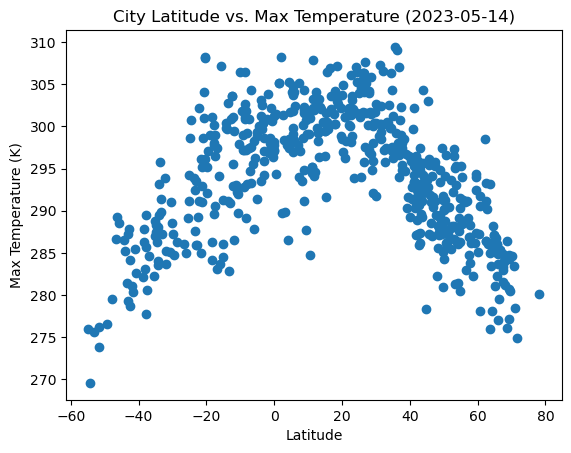

In [35]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat'].astype('float')
y_values = city_data_df['Max Temp'].astype('float')
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature (K)')
plt.title(f'City Latitude vs. Max Temperature (2023-05-14)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

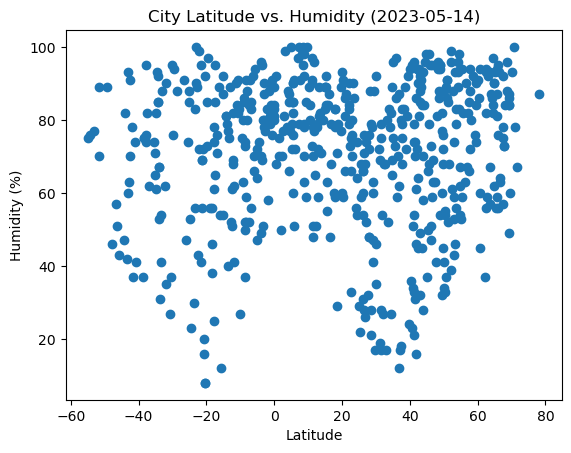

In [36]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat'].astype('float')
y_values = city_data_df['Humidity'].astype('float')
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(f'Humidity (%)')
plt.title(f'City Latitude vs. Humidity (2023-05-14)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

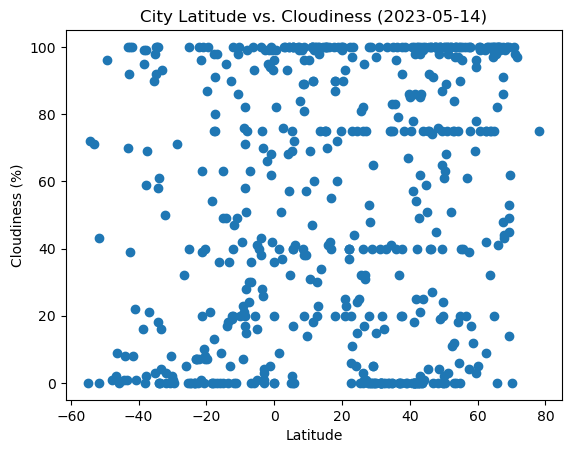

In [37]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat'].astype('float')
y_values = city_data_df['Cloudiness'].astype('float')
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness (2023-05-14)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

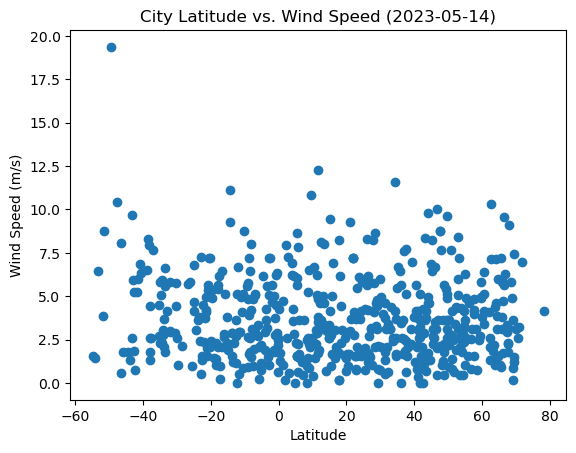

In [38]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat'].astype('float')
y_values = city_data_df['Wind Speed'].astype('float')
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed (2023-05-14)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {rvalue}')
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0.1,0.1),fontsize=15,color="red",xycoords="axes fraction")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,omdurman,15.6445,32.4777,300.56,63,100,4.99,SD,1693453654
1,champerico,14.3000,-91.9167,300.54,80,100,3.00,GT,1693453655
3,howrah,22.5892,88.3103,306.15,75,20,1.54,IN,1693453655
4,ust-nera,64.5667,143.2000,288.21,84,97,3.88,RU,1693453655
8,beyneu,45.3167,55.2000,292.83,50,4,6.43,KZ,1693453656


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,285.27,82,8,1.34,NZ,1693453655
5,grytviken,-54.2811,-36.5092,269.57,76,72,1.45,GS,1693453655
6,blackmans bay,-43.0167,147.3167,287.22,60,70,5.96,AU,1693453656
7,edinburgh of the seven seas,-37.0676,-12.3116,284.64,62,21,7.68,SH,1693453656
11,kuta,-8.7233,115.1723,301.12,74,20,7.20,ID,1693453657


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7445536929331107


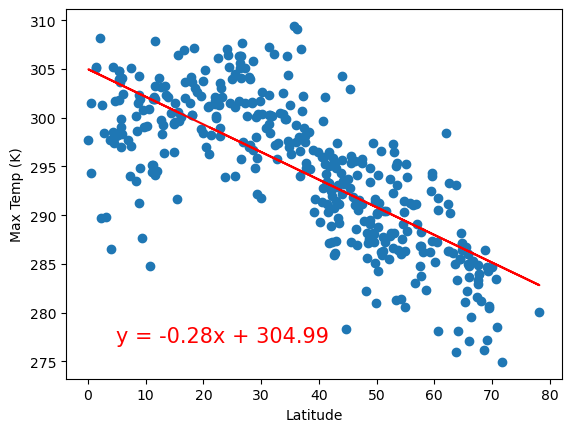

In [49]:
# Linear regression on Northern Hemisphere
linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    'Latitude',
    f'Max Temp (K)',
)

The r-value is: 0.7533060813420406


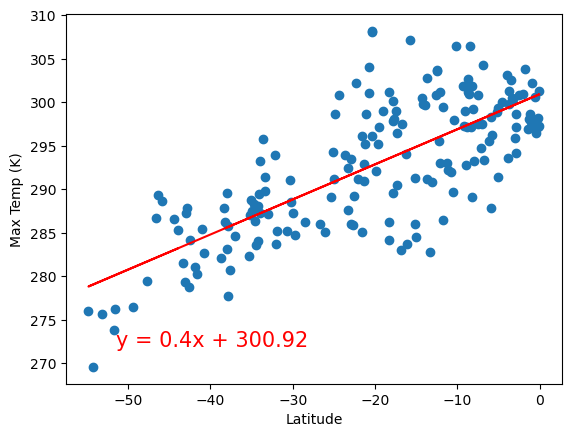

In [50]:
# Linear regression on Southern Hemisphere
linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    'Latitude',
    f'Max Temp (K)',
)

**Discussion about the linear relationship:**
The northern hemisphere shows a negative linear relationship, where increasing the latitude away from the equator results in lower max temperatures. The opposite is true of the southern hemisphere, where increasing the latitude towards the equator results in higher max temperatures. The graphs show that temperatures generally rise as you approach the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007412778284114475


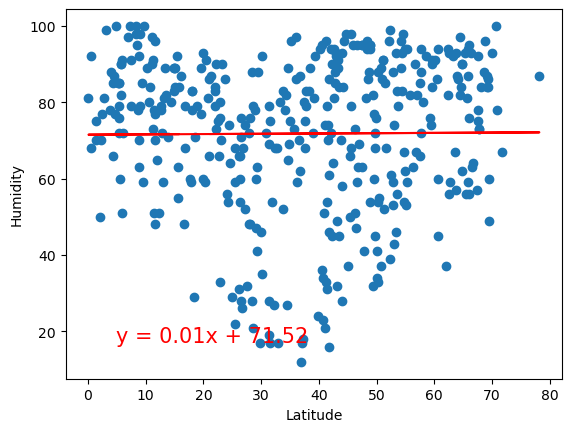

In [51]:
# Northern Hemisphere
linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    'Latitude',
    f'Humidity',
)

The r-value is: 0.13444392356773865


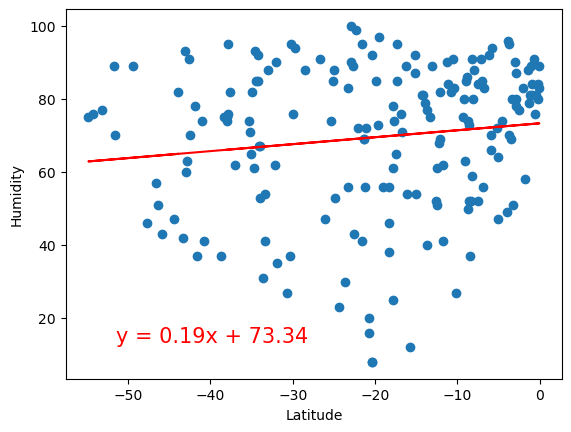

In [52]:
# Southern Hemisphere
linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    'Latitude',
    f'Humidity',
)

**Discussion about the linear relationship:**
With very weak r-values, neither hemispheres seem to display a relationship between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06570024210100632


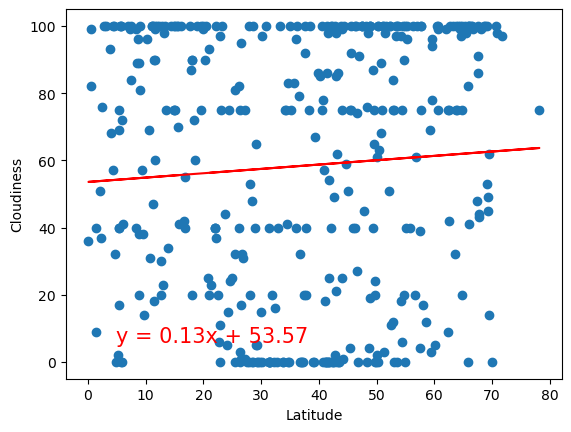

In [53]:
# Northern Hemisphere
linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    'Latitude',
    f'Cloudiness',
)

The r-value is: 0.07676191959778225


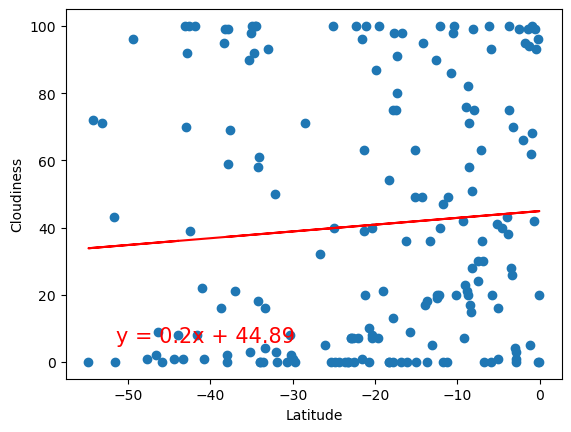

In [54]:
# Southern Hemisphere
linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    'Latitude',
    f'Cloudiness',
)

**Discussion about the linear relationship:**
Similar to humidity, weak r-values show that there is not a significant relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.029775451298649683


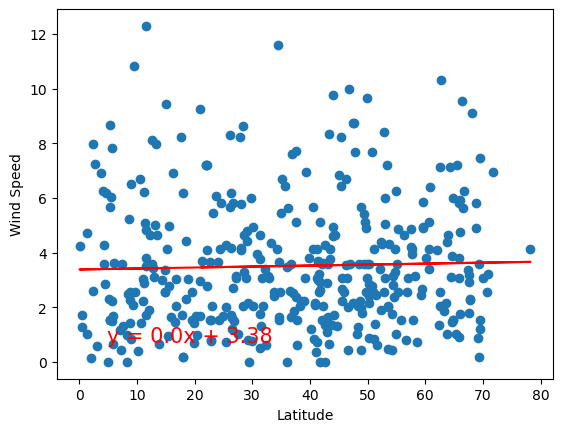

In [55]:
# Northern Hemisphere
linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    'Latitude',
    f'Wind Speed',
)

The r-value is: 0.07676191959778225


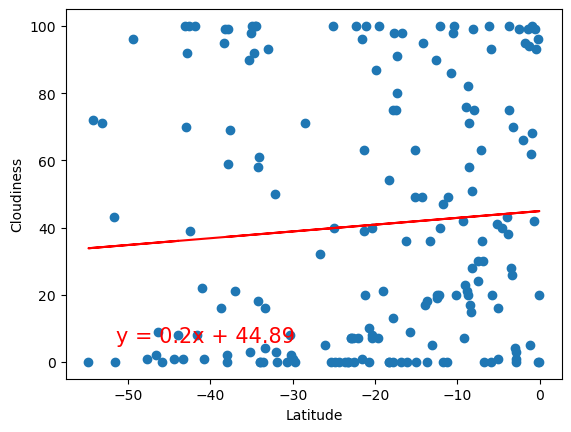

In [56]:
# Southern Hemisphere
linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    'Latitude',
    f'Cloudiness',
)

**Discussion about the linear relationship:**
Lastly, the low r-values again show that there is no significant relationship between latitude and cloudiness.